# Connaître ses clients

Une des applications les plus courantes du KMeans est d’apprendre à connaître ses clients. Prenez un dataset très simple qui est Mall Customers pour essayer de découvrir des segmentations clients.


0. Importez les librairies usuelles 

In [0]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

1. Importez votre dataset ```Mall_Customers.csv```

In [0]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Enlevez la variable ```CustomerID``` de votre dataset 

In [0]:
dataset = dataset.drop(columns=['CustomerID'],axis=1)
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


3. Dummyfiez vos variables catégoriques 

In [0]:
Gdataset = pd.get_dummies(dataset)


from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
dataset = sc_x.fit_transform(dataset)
pd.DataFrame(dataset).head()

,0,1,2,3,4
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


4. Nous allons construire nos clusters mais pour cela, nous avons besoin de connaître le nombre optimum de clusters dont on a besoin. Utilisez tout d'abord la méthode ```Elbow``` pour voir si on peut voir combien il nous faudra prendre comme valeur pour ```k```

<function matplotlib.pyplot.show>

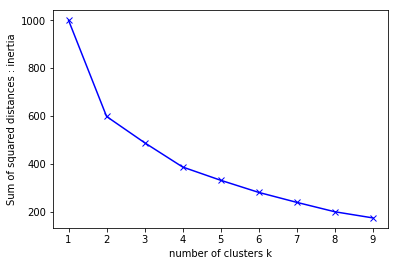

In [0]:
from sklearn.cluster import KMeans

sum_squared_dist = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(dataset)
    sum_squared_dist.append(km.inertia_)
plt.plot(K, sum_squared_dist, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances : inertia')
plt.show


5. Utilisez ensuite la méthode _Silhouette_ pour voir si on peut affiner notre hypothèse pour ```k```

For n_clusters = 2 The average silhouette_score is : 0.29298136996751367
For n_clusters = 3 The average silhouette_score is : 0.38366377184202277
For n_clusters = 4 The average silhouette_score is : 0.4051292479311983
For n_clusters = 5 The average silhouette_score is : 0.443849645338732
For n_clusters = 6 The average silhouette_score is : 0.45176811980591935


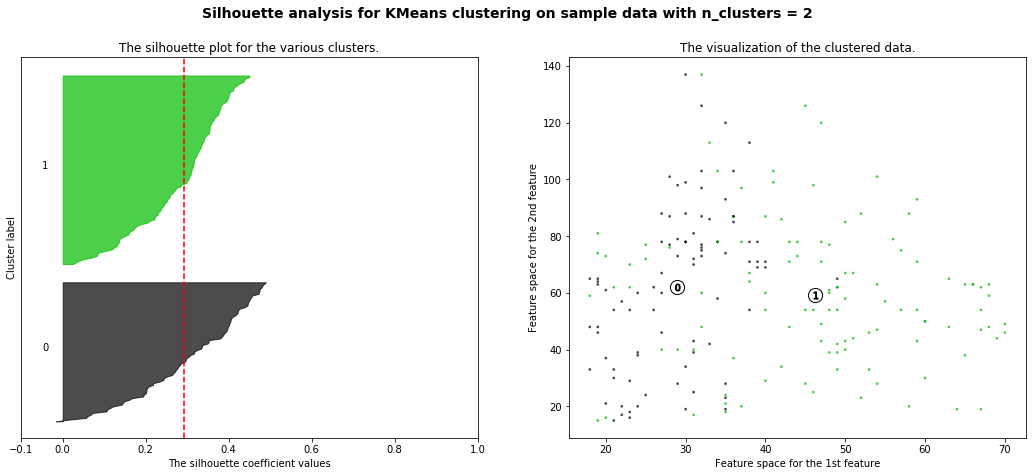

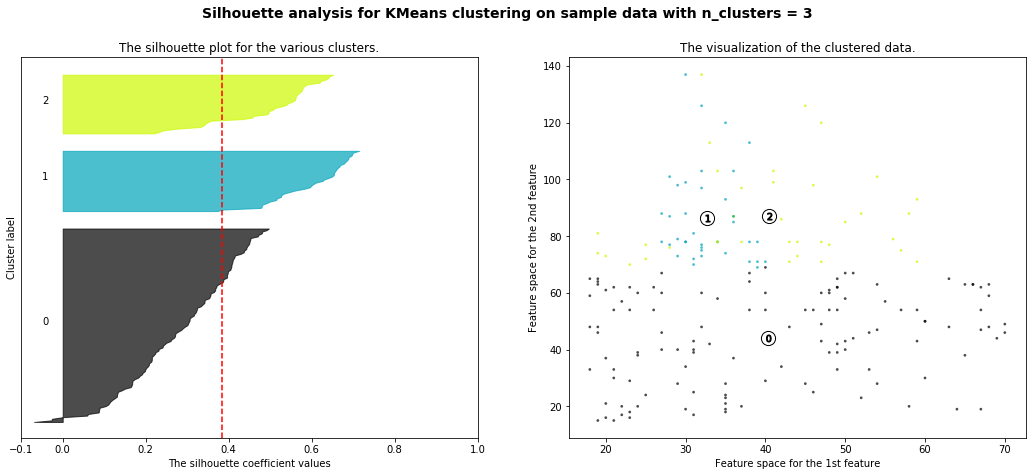

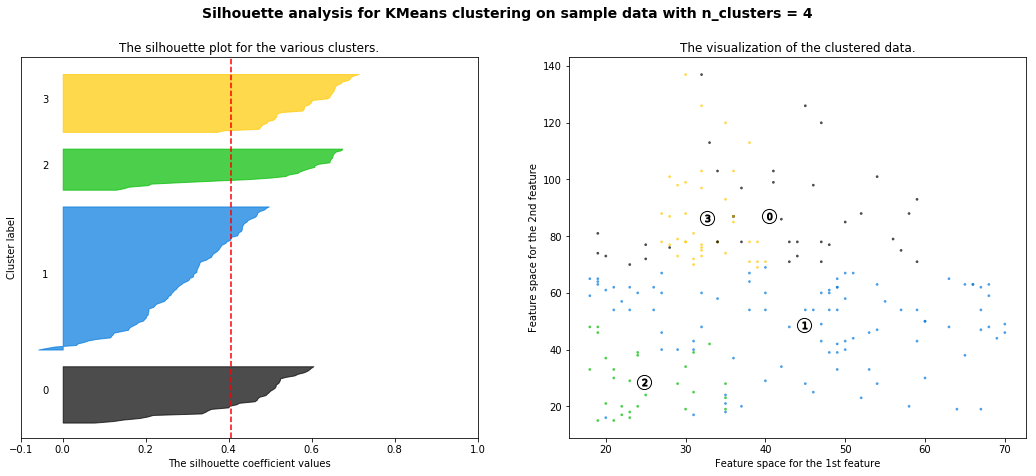

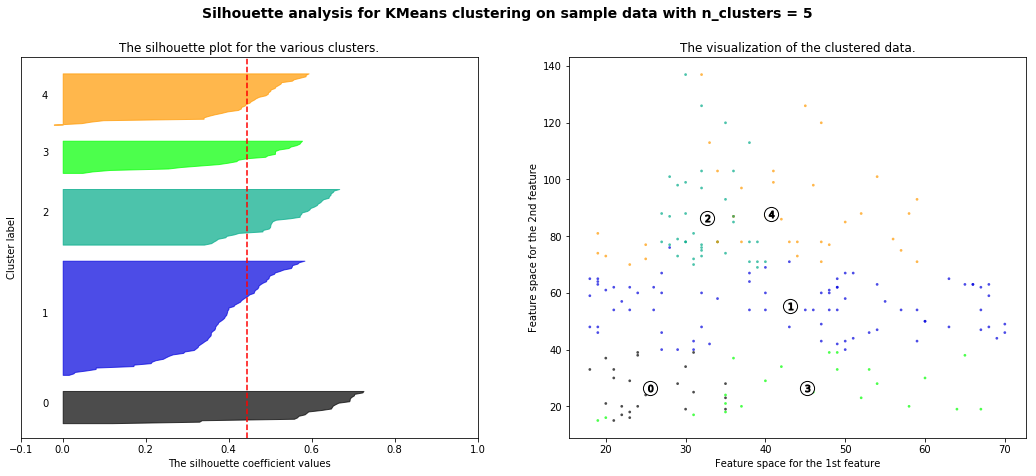

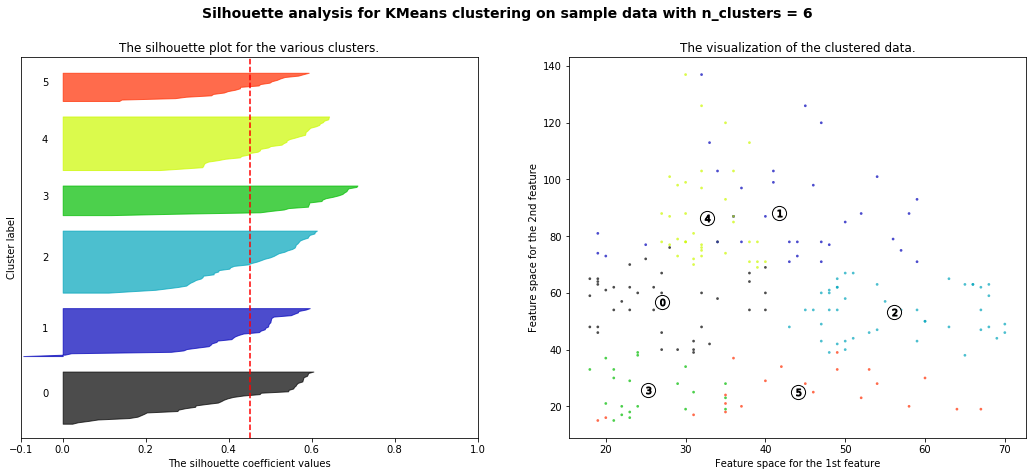

In [0]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


6. Pour la suite, nous allons prendre ```k=5``` clusters. Appliquez donc les KMeans sur votre dataset 

7. Créeons un graphique qui nous permettra de visualiser chacun des clusters ainsi que leur centroïds. On prendra d'abord le ```Spending Score``` comme ordonnée et le ```Annual Income``` en abscisse 

8. On a une jolie visualisation avec une belle séparation des clusters. Regardez cette fois la variable ```Age``` par rapport au ```Spending Score```. Que remarquez vous ?